<H1>AI Trading Term II</H1>

<H2>Natural Language Processing - NLP</H2>

<li>Structured Languages are unambiguous - Natural language is not.</li>
<li>Violation of grammatical rules - syntax error</li>
<li></li>

In [6]:
text = "As I was waiting, a man came out of a side room, and at a glance I was sure he must be Long John. His left leg was cut off close by the hip, and under the left shoulder he carried a crutch, which he managed with wonderful dexterity, hopping about upon it like a bird. He was very tall and strong, with a face as big as a ham—plain and pale, but intelligent and smiling. Indeed, he seemed in the most cheerful spirits, whistling as he moved about among the tables, with a merry word or a slap on the shoulder for the more favoured of his guests."

import re

def count_words(text):
    counts = dict()  # dictionary of { <word>: <count> } pairs to return
    ltext = text.lower()
    listwords = ltext.split()
    newlist = []
    for w in listwords:
        w = re.sub(r'[^\w\s]','', w)
        newlist.append(w)
    counts = [newlist.count(word) for word in newlist]
    return dict(list(zip(newlist,counts)))

#count_words(text)

NLP Pipeline : Text processing, Feature Extraction, Modeling
<strong>Text Processing</strong>
<li>case normalization</li>
<li>punctuation removal (regex)</li>
<li>Tokenization: split sentence into sequence of words - .split() // NLTK library</li>
<li>word_tokenize from nltk.tokenize works like split but has cleanups included</li>
<li>http://www.nltk.org/api/nltk.tokenize.html</li>
<hr>
<li>BeautifulSoup helps to parse web text and "walk" the DOM tree</li>
<li>stop word removal also available in NLTK , language dependend</li>
<li>part of speech tagging (verb, noun,...) important to retain relationships</li>
<hr>
<li>stemming: reducing a word to its root form, reduce complexity (may not be a real word)</li>
<li>lemmatization: map word back to a root using a dictionary (is,was,will -> be)</li>
<li>if both methods are used (common), lemma first, then stem</li>

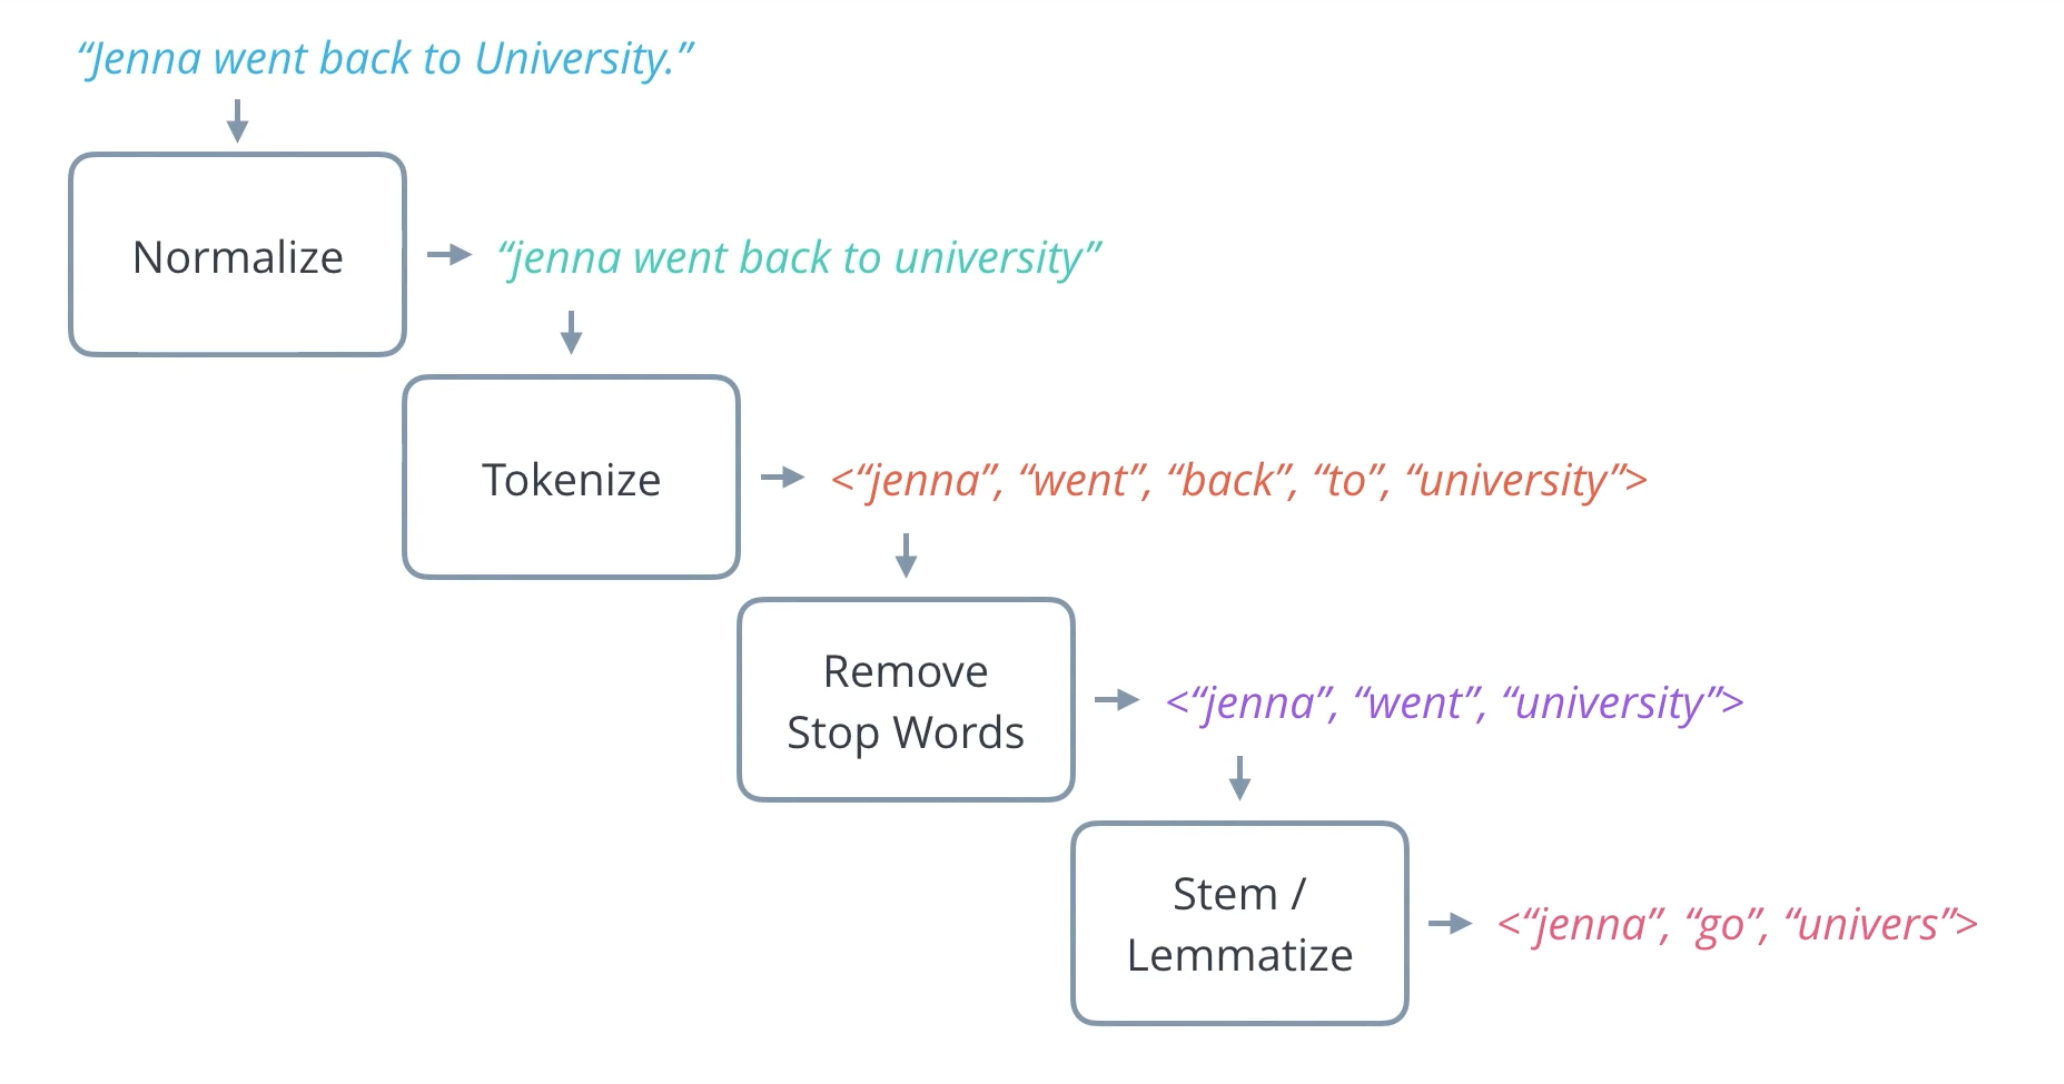

<h3> Feature Extraction </h3>

<li>bag of words - each document like an unordered collection of words</li>
<li>Document-term matrix - each document in one axis, another with each word, then count frequencies</li>
<li>TF-IDF : quotient of word frequency per document compared to overall frequency between words : show whats unique</li>
<li>Numerical Representation of Words - Embeddings</li>
<li>One hot encoding: treat word like a class label, matrix 0,1</li>
<li>OHE breaks with large word vectors, word embeddings work here</li>
<li>Word Embeddings: two similar words are closer together in a vector</li>
<li>Word2Vec: Word Embedding version which predicts word neighbors in a sentence</li>
<li>Glove: GLobal Vector of word representation: considers context of words -> "Co occurence probablities"</li>
<li>word embeddings are used in neural networks to predict word meanings</li>
<li>t-SNE: dimensionality reduction technique to map high dimensionality vectors to a lower dimensional space, also works on images!</li>

<li>SEC : Securities and Exchange Commission asks companies to issue 10K (annual) and 10-Qs (quarterlies)</li>
<li>EDGAR: Electronic Data Gathering Analysis and Retrieval: Website making access to financial statements in US</li>
<li>https://www.sec.gov/edgar/searchedgar/companysearch.html</li>
<li>ITEM 1A - Risk Factors; Item 7 - Management discussion on financials and operations - 7a - Market risk discloures</li>
<li>plain text format of 10k will be used for analysis</li>
<hr>
<li>words will usually have certain sentiments e.g. "risk of bankrupcy", "increase in profits"</li>
<li>Regular expressions can help to quick find any pattern of words relevant</li>
<li></li>

In [11]:
#raw strings used to create regular expressions
#precursor of r 
print(r'Hello\n\tWorld')

Hello\n\tWorld


In [12]:
import re
sample_text = 'Alice and Walter are walking to the store.'
# Create a regular expression object with the regular expression 'a'
regex = re.compile(r'a')
# Search the sample_text for the regular expression
matches = regex.finditer(sample_text)
for match in matches:
    print(match)

<re.Match object; span=(6, 7), match='a'>
<re.Match object; span=(11, 12), match='a'>
<re.Match object; span=(17, 18), match='a'>
<re.Match object; span=(22, 23), match='a'>


In [14]:
print(sample_text[6:7])
#Regex are case sensitive!

a


In [15]:
regex = re.compile(r'walking')
matches = regex.finditer(sample_text)
for match in matches:
    print(match)

    print('\nMatch from the original text:', sample_text[match.span()[0]:match.span()[1]])

<re.Match object; span=(21, 28), match='walking'>

Match from the original text: walking


list of the metacharacters used in regular expressions:

. ^ $ * + ? { } [ ] \ | ( )

In [16]:
sample_text = '. ^ $ * + ? { } [ ] \ | ( )'
regex = re.compile(r'\. \^ \$ \* \+ \? \{ \} \[ \] \\ \| \( \)')
matches = regex.finditer(sample_text)
for match in matches:
    print(match)
    # Using the span information from the match, print the match from the original string
    print('\nMatch from the original text:', sample_text[match.span()[0]:match.span()[1]])

<re.Match object; span=(0, 27), match='. ^ $ * + ? { } [ ] \\ | ( )'>

Match from the original text: . ^ $ * + ? { } [ ] \ | ( )


In [17]:
sample_text = 'John bought a winter coat for $25.99 dollars.'

# Create a regular expression object with the regular expression
regex = re.compile(r'\$25\.99')

# Searching For Simple Patterns

Being able to match letters and metacharacters is the simplest task that regular expressions can do. In this section we will see how we can use regular expressions to perform more complex pattern matching. We can form any pattern we want by using the metacharacters mentioned in the previous lesson.

The first metacharacter we are going to look at is the backslash (`\`). We already saw that the backslash can be used to escape all the metacharacters, so that you can search for them directly. However, the backslash can also be followed by various characters to signal various special sequences. Here is a list of the special sequences we are going to look at in this notebook:

* `\d` - Matches any decimal digit; this is equivalent to the set [0-9]


* `\D` - Matches any non-digit character; this is equivalent to the set [^0-9]


* `\s` - Matches any whitespace character, this is equivalent to the set [ \t\n\r\f\v]


* `\S` - Matches any non-whitespace character; this is equivalent to the set [^ \t\n\r\f\v]


* `\w` - Matches any alphanumeric character and the underscore; this is equivalent to the set [a-zA-Z0-9_]

 
* `\W` - Matches any non-alphanumeric character; this is equivalent to the set [^a-zA-Z0-9_]

We can see that there is a difference between lowercase and uppercase sequences. For example, while `\d` matches any digit, `\D` matches everything that is **not** a digit. Similarly, while `\s` matches any whitespace character, `\S` matches everything that is **not** a whitespace character; and while `\w` matches any alphanumeric character, `\W` matches everything that is **not** an alphanumeric character.

Let's start by learning how to use `\d` to search for decimal digits.

In [19]:
# Sample text
sample_text = 'Here are three IP address: 123.456.789.123, 999.888.777.666, 111.222.333.444'

# Create a regular expression object with the regular expression
regex = re.compile(r'\d\d\d\.\d\d\d\.\d\d\d\.\d\d\d')


In [20]:
sample_text = '''
John Sanders: j.s@email.com
Alice Walters: a.w@email.com
Mary Jones: m.j@email.com
'''

# Print sample_text
print('Sample Text:\n', sample_text)

# Create a regular expression object with the regular expression
regex = re.compile(r'\w\.\w@email.com')

Sample Text:
 
John Sanders: j.s@email.com
Alice Walters: a.w@email.com
Mary Jones: m.j@email.com



# Word Boundaries

We will now learn about another special sequence that you can create using the backslash:

* `\b`

This special sequence doesn't really match a particular set of characters, but rather determines word boundaries. A word in this context is defined as a sequence of alphanumeric characters, while a boundary is defined as a white space, a non-alphanumeric character, or the beginning or end of a string. We can have boundaries either before or after a word. Let's see how this works with an example.

In the code below, our `sample_text` string contains the following sentence:

```
The biology class will meet in the first floor classroom to learn about Theria, a subclass of mammals.
```

As we can see the word `class` appears in three different positions:

1. As a stand-alone word: The word `class` has white spaces both before and after it.


2. At the beginning of a word: The word `class`  in `classroom` has a white space before it.


3. At the end of a word: The word `class`  in `subclass` has a whitespace after it.

If we use `class` as our regular expression, we will match the word `class` in all three positions as shown in the code below:

Now, let's use word boundaries to only find the word `class` when it appears in particular positions. Let’s start by using `\b` to only find the word `class` when it appears at the beginning of a word. We can do this by adding `\b` before the word `class` in our regular expression as shown below:

In [21]:
sample_text = 'The biology class will meet in the first floor classroom to learn about Theria, a subclass of mammals.'

# Create a regular expression object with the regular expression '\bclass'
regex = re.compile(r'\bclass')

Now, let's use `\b` to only find the word `class` when it appears at the end of a word. We can do this by adding `\b` after the word `class` in our regular expression as shown below:

In [23]:
# Sample text
sample_text = 'The biology class will meet in the first floor classroom to learn about Theria, a subclass of mammals.'

# Create a regular expression object with the regular expression 'class\b'
regex = re.compile(r'class\b')

In [24]:
#Standalone word
regex = re.compile(r'\bclass\b')

<h3>Find 3 letter words</h3>

In [25]:
sample_text = 'John went to the store in his car, but forgot to buy bread.'

# Create a regular expression object with the regular expression
regex = re.compile(r'\b\w\w\w\b')

count how many numbers (greater than 3), have 3 as their last digit. For example, 93 is greater than 3 and its last digit is 3, so your code should count this number as a match. However, the number 3 by itself should not be counted as a match. 

In [26]:
sample_text = '203 3 403 687 283 234 983 345 23 3 74 978'
regex = re.compile(r'\B3\b')
matches = regex.finditer(sample_text)

# Set counter
num_matches = 0

# Print all the matches
for match in matches:
    print(match)
    num_matches += 1
    
# Print the total number of matches    
print('\nTotal Number of Matches:', num_matches)

<re.Match object; span=(2, 3), match='3'>
<re.Match object; span=(8, 9), match='3'>
<re.Match object; span=(16, 17), match='3'>
<re.Match object; span=(24, 25), match='3'>
<re.Match object; span=(31, 32), match='3'>

Total Number of Matches: 5


In [28]:
#match word only at the beginning of a string with caret ^
regex = re.compile(r'^this')

In [29]:
#matching last instance with $
regex = re.compile(r'watch$')

In [30]:
# Import re module
import re

# Sample text
sample_text = '''
Mr. Brown: 555-123-4567
Mrs. Smith: 455 555 4549
Mr. Jackson: 655-777-7346
Ms. Wilson: (555)999-8464
'''

# Create a regular expression object with a regular expression that can match all the
# phone numbers in our sample_text
regex = re.compile(r'\d\d\d.\d\d\d.\d\d\d\d')

# Search the sample_text for the regular expression
matches = regex.finditer(sample_text)

# Print all the matches
for match in matches:
    print(match)

<re.Match object; span=(12, 24), match='555-123-4567'>
<re.Match object; span=(37, 49), match='455 555 4549'>
<re.Match object; span=(63, 75), match='655-777-7346'>
<re.Match object; span=(89, 101), match='555)999-8464'>


the sequence `\d{3}` is equivalent to the sequence ` \d\d\d`.

Consequently, we can employ the `{}` metacharacters to write the previous code in a more compact form, as shown below:

In [32]:
regex = re.compile(r'\d{3}.\d{3}.\d{4}')

### Finding Phone Numbers With Specific Separators

Now let's suppose we only wanted to find phone numbers in which the groups of digits were separated by either a dash (`-`) or a white space (` `). In this case we can use what is known as a **Character Set**. Character sets are specified using the `[]` metacharacters and are used to indicate a set of characters that you wish to match. Let’s see an example.

In the code below, we employ the character set `[-  ]` (notice that there is a whitespace after the dash) in our regular expression to only match phone numbers whose groups of numbers are separated by either a dash (`-`) or a white space (` `):

In [33]:
regex = re.compile(r'\d{3}[- ]\d{3}[- ]\d{4}')

### Finding Phone Numbers With Specific Separators and Area Codes

Let's see another example of a character set. Now, let's suppose we only wanted to find phone numbers in which the groups of digits were separated by either a dash or a white space, and that have area code `455` or `655`. Since all the area codes in our `sample_text` end in 55:

```
Mr. Brown: 555-123-4567
Mrs. Smith: 455 555 4549
Mr. Jackson: 655-777-7346
Ms. Wilson: (555)999-8464
```

Then, in order to find all the phone numbers that have area code `455` or `655`, we only need to indicate that the first digit in the area code must be either a `4` or a `6`. 

To do this, we can use the character set `[46]` in our regular expression to indicate that the first number should be either a `4` or a `6`, as shown in the code below:

In [34]:
regex = re.compile(r'[46]55[- ]\d{3}[- ]\d{4}')

### Finding Phone Numbers With Specific Last Digits

Now let's suppose we wanted to look for phone numbers that end on the numbers `6`, `7`, `8`, or `9`. In this case, we could use the character set `[6789]`. However, there is a more compact form of doing this. **Within** a character set, when a dash (`-`) is placed **between** digits or letters, it is used to specify a range. For example, the character set `[6-9]` is equivalent to the character set `[6789]` and the character set `[a-f]` is equivalent to the character set `[abcdef]`. It is important to note, that when a dash is placed at the **beginning** of a character set, as we did in the previous example, the dash is taken **literally**. Let’s see how this works.

In the code below, we will use the character set `[6-9]` in our regular expression to find all the phone numbers that end on the numbers `6`, `7`, `8`, or `9`:

In [35]:
regex = re.compile(r'\d{3}.\d{3}.\d{3}[6-9]')

[^6-9]` will match any character that is **not** a `6`, `7`, `8`, or `9`. Similarly, the regular expression `[^a-zA-Z] `will match any character that is **not** a lowercase or uppercase letter. Let’s see how this works.

In the code below, we will use the character set `[^6-9]` in our regular expression to find all the phone numbers that **do not** end on the numbers `6`, `7`, `8`, or `9`:

In [36]:
regex = re.compile(r'\d{3}.\d{3}.\d{3}[^6-9]')

In [38]:
#find country codes
sample_text = '''
Mr. Brown: +1-555-123-4567
Mrs. Smith: +61 455 555 4549
Mr. Jackson: +375-655-777-7346
Ms. Wilson: +213(555)999-8464
'''

# Create a regular expression object with a regular expression
regex = re.compile(r'\+\d{1,3}.\d{3}.\d{3}.\d{4}')

# Finding Complicated Patterns

In this lesson, we will learn how to use the remaining metacharacters in our list, namely:

```python
* + ? | ( )
```
We will employ these metacharacters to find more complicated patterns of text. 

### Finding Names

In the code below, our `sample_text` consists of a multi-line string that contains the names and heights of the 4 highest mountains in the world according to Wikipedia:

```
Mt Everest: Height 8,848 m
Mt. K2: Height 8,611 m
Mt Kangchenjunga: Height 8,586 m
Mt. Lhotse: Height 8,516 m
```

Let's create a regular expression that will allow us to find the names of these mountains. The first thing to notice is that the word mountain has been abbreviated in two different ways, as `Mt.` and as `Mt` (without the period). Therefore, if we want to find all the names of the mountains we need to indicate in our regular expression that the period (`.`) in the abbreviation is optional. We can do this by using the `?` metacharacter in our regular expression. The `?` will match 0 or 1 repetitions of the preceding regular expression. For example, the regular expression `ab?` will match either `a` or `ab`. In other words, the `?` after the `b` indicates that the `b` after the `a` is optional. Let’s see how this works.

In the code below, we employ the `?` metacharacter to indicate that the period (`.`) after `Mt` is optional by using the regular expression `Mt\.?`:

In [39]:
regex = re.compile(r'Mt\.?')

In the code below, we employ the `*` metacharacter to find the names of the mountains regardless of their length:

In [40]:
regex = re.compile(r'Mt\.?\s[A-Z]\w*')

In the code below, we will use the group `(Mt|Mnt)` in our regular expression to be able to match either `Mnt` or `Mt`:

In [41]:
regex = re.compile(r'(Mt|Mnt)\.?\s[a-zA-Z]\w*')

In [42]:
regex = re.compile(r'M(t|nt)\.?\s[a-zA-Z]\w*')

<h3>find email adresses with regex revisted</h3>

In [43]:
# Sample text
sample_text = '''
fake_email@fake-email.edu
fakeemail43@fake_email.com
fake891_email@fakemail.gov
52fake_email@FAKE_email.com.nl
'''

# Create a regular expression object with a regular expression that can match all
# the email addresses
regex = re.compile(r'[a-z_0-9]+@[a-zA-Z_-]+\.[a-z]+\.?[a-z]+')

# Substitutions

As we mentioned at the beginning of this lesson, the `re` module also has functions that allow us to modify strings. Regex objects have the `.sub()` method that allows us to replace patterns within a string. Let' see an example.

In the code below we have a multi-line string that contains two instances of the ampersand character, `&`. Let's use the `.sub` method to replace these ampersands with the word `and`. First we will create a regular expression that matches all the `&` characters in our string. Then we will use `regex.sub(r'and', sample_text)` to replace every match of the `regex` expression in the `sample_text` with the raw string `and`. Let's see this in action:

In [44]:
# Import re module
import re

# Sample text
sample_text = '''
Ben & Jerry
Jack & Jill
'''

# Create a regular expression object with the regular expression '&'
regex = re.compile(r'&')

# Substitute all & in the sample_text with 'and'
new_text = regex.sub(r'and', sample_text)

# Print Original and Modified texts
print('Original text:', sample_text)
print('Modified text:', new_text)

Original text: 
Ben & Jerry
Jack & Jill

Modified text: 
Ben and Jerry
Jack and Jill



# Substitutions with Groups

We can do more sophisticated substitutions by using groups. Let's see an example. In the code below we have a multi-line string that contains the names of 4 people. As we can see, some people have middle names but other don't. Let's use the `.sub()` method to replace all names in the string with just the first and last name. For example, the name `John David Smith` should be replaced by `John Smith` and `Alice Jackson` should stay the same.

The first step is to create a regular expression that matches all the names in the list. Now, keeping in mind that we need to be able to make replacements later we will use groups to be able to distinguish between the first name, the middle name, and the last name. Since all names have a first name then we can use this group `([a-zA-z]+)` to match all the first names. Now, not all names have middle names, so having a middle name is optional. Since the first and middle name are separated by a whitespace we also need to indicate that the whitespace is also optional. So, to do indicate that the whitespace and middle name are optional we will include the `?` metacharacter after the whitespace and second group, `[ ]?([a-zA-z]+)?`. After the first or middle name we have a whitespace that we can match with `\[  \]`. Notice that in this case we didn't use the sequence `\\s` since this will match newlines as well and we don't what match those. Finally we make a third group to match the last name. Since all names have last names, we don't need to use the `?` metacharacter. Putting all together we get:

In [45]:
# Import re module
import re

# Sample text
sample_text = '''
John David Smith
Alice Jackson
Mary Elizabeth Wilson
Mike Brown
'''

# Create a regular expression object with a regular expression that can find all
# the names in the sample_text and group the first, middle, and
# last names separately
regex = re.compile(r'([a-zA-z]+)[ ]?([a-zA-z]+)?[ ]([a-zA-z]+)')

# Search the sample_text for the regular expression
matches = regex.finditer(sample_text)

# Print all the matches
for match in matches:
    print(match)

<re.Match object; span=(1, 17), match='John David Smith'>
<re.Match object; span=(18, 31), match='Alice Jackson'>
<re.Match object; span=(32, 53), match='Mary Elizabeth Wilson'>
<re.Match object; span=(54, 64), match='Mike Brown'>


We can clearly see that we matched all the four names in our list. Now, the cool thing about using groups is that we can reference them individually from the Match Objects using the `.group()` method. The `.group(N)` method selects the `N`th group in the match. Therefore, in our particular case, for each match, `.group(1)` will select the first name, `.group(2)` will select the middle name, and `.group(3)` will select the last name. Let's see how this works in the code below:

In [46]:
# Import re module
import re

# Sample text
sample_text = '''
John David Smith
Alice Jackson
Mary Elizabeth Wilson
Mike Brown
'''

# Create a regular expression object with a regular expression that can find all
# the names in the sample_text and group the first, middle, and
# last names separately
regex = re.compile(r'([a-zA-z]+)[ ]?([a-zA-z]+)?[ ]([a-zA-z]+)')

# Search the sample_text for the regular expression
matches = regex.finditer(sample_text)

# For each match print the first, middle, and last name separately
for match in matches:
    print('\nFirst Name: '+ match.group(1))
    
    if match.group(2) is None:
        print('Middle Name: None')
    else:
        print('Middle Name: '+ match.group(2))
    print('Last Name: '+ match.group(3))


First Name: John
Middle Name: David
Last Name: Smith

First Name: Alice
Middle Name: None
Last Name: Jackson

First Name: Mary
Middle Name: Elizabeth
Last Name: Wilson

First Name: Mike
Middle Name: None
Last Name: Brown


We can see that for each of the four matches we can selectively choose the first, middle, or last name. We should also mention that `.group(0)` (or equivalently `.group()`) selects all the groups at once. 

Now, that we know how to select groups individually for each match, we are ready to use the `.sub()` method to make substitutions. Remember, `regex.sub(r'string', sample_text)` will replace every match of the `regex` expression in the `sample_text` with the raw string `string`. So, what we want to do in our case, is to replace every match with only the first and last names, or equivalently replace every match with the first and third groups. We can refer to each group in the `string` by using the backslash. For example, `regex.sub(r'\1', , sample_text)` will replace every match with the first group. Here we have reference the first group by using `\1` inside the `string`. Let's put it all together to see how it works:

In [47]:
# Import re module
import re

# Sample text
sample_text = '''
John David Smith
Alice Jackson
Mary Elizabeth Wilson
Mike Brown
'''

# Create a regular expression object with a regular expression that can find all
# the names in the sample_text and group the first, middle, and
# last names separately
regex = re.compile(r'([a-zA-z]+)[ ]?([a-zA-z]+)?[ ]([a-zA-z]+)')

# Substitute all names in the sample_text with the first and last name
new_text = regex.sub(r'\1 \3', sample_text)

# Print the modified text
print(new_text)


John Smith
Alice Jackson
Mary Wilson
Mike Brown



# Flags

We saw at the beginning of this lesson that regexes are case sensitive, therefore we often have to use regexes with both uppercase and lower case letters. However, the `re.compile(pattern, flags)` function, has a `flag` keyword that can be used to allow more flexibility. For example, the `re.IGNORECASE` flag can be used to perform **case-insensitive** matching. In the code below we have a string that contains the name Walter written in two different combinations of upper and lower case letters. In order to be able to find this two renditions of Walter, we will probably have to use a long character set to be able to account for all possible combinations of lower and upper case letters. However, in this case we can use the `re.IGNORECASE` to indicate that we don't care about the case of the letters, we just want to find the name Walter no matter how it is written. Let's see how this works:

In [48]:
# Import re module
import re

# Sample text
sample_text = 'Alice and WaLtEr Brown are talking with wAlTer Jackson.'

# Create a regular expression object with the regular expression 'walter'
# that ignores the case of the letters
regex = re.compile(r'walter', re.IGNORECASE)

# Search the sample_text for the regular expression
matches = regex.finditer(sample_text)

# Print all the matches
for match in matches:
    print(match)

<re.Match object; span=(10, 16), match='WaLtEr'>
<re.Match object; span=(40, 46), match='wAlTer'>


<h1>BeautifulSoup HTML Parser</h1>

In [52]:
# Import BeautifulSoup
from bs4 import BeautifulSoup

# Open the HTML file and create a BeautifulSoup Object
with open('./sample.html') as f:
    page_content = BeautifulSoup(f, 'lxml')

# Print the BeautifulSoup Object
print(page_content)

<!DOCTYPE html>
<html class="no-js" lang="de">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<base href="https://meerbusch.de/"/>
<title>Bildung, Kultur 
und Tourismus - Sehenswürdigkeiten - Lank-Latum | Meerbusch</title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=4.0, user-scalable=1" name="viewport"/>
<link href="layouts/Default/util/icons/apple-touch-icon-57x57.png?id=1589198376" rel="apple-touch-icon" sizes="57x57"/>
<link href="layouts/Default/util/icons/apple-touch-icon-60x60.png?id=1589198376" rel="apple-touch-icon" sizes="60x60"/>
<link href="layouts/Default/util/icons/apple-touch-icon-72x72.png?id=1589198377" rel="apple-touch-icon" sizes="72x72"/>
<link href="layouts/Default/util/icons/apple-touch-icon-76x76.png?id=1589198377" rel="apple-touch-icon" sizes="76x76"/>
<link href="layouts/Default/util/icons/apple-touch-icon-114x114.png?id=1589198376" rel="apple-touch-icon" sizes="114x114"/>
<link href="layouts/Defaul

In [53]:
print(page_content.prettify())

<!DOCTYPE html>
<html class="no-js" lang="de">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <base href="https://meerbusch.de/"/>
  <title>
   Bildung, Kultur 
und Tourismus - Sehenswürdigkeiten - Lank-Latum | Meerbusch
  </title>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=4.0, user-scalable=1" name="viewport"/>
  <link href="layouts/Default/util/icons/apple-touch-icon-57x57.png?id=1589198376" rel="apple-touch-icon" sizes="57x57"/>
  <link href="layouts/Default/util/icons/apple-touch-icon-60x60.png?id=1589198376" rel="apple-touch-icon" sizes="60x60"/>
  <link href="layouts/Default/util/icons/apple-touch-icon-72x72.png?id=1589198377" rel="apple-touch-icon" sizes="72x72"/>
  <link href="layouts/Default/util/icons/apple-touch-icon-76x76.png?id=1589198377" rel="apple-touch-icon" sizes="76x76"/>
  <link href="layouts/Default/util/icons/apple-touch-icon-114x114.png?id=1589198376" rel="apple-touch-icon" sizes="114x114"/

In [54]:
with open('./sample.html') as f:
    page_content = BeautifulSoup(f, 'lxml')

# Access the head tag
page_head = page_content.head

# Print the Tag Object
print(page_head.prettify())

<head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <base href="https://meerbusch.de/"/>
 <title>
  Bildung, Kultur 
und Tourismus - Sehenswürdigkeiten - Lank-Latum | Meerbusch
 </title>
 <meta content="width=device-width, initial-scale=1.0, maximum-scale=4.0, user-scalable=1" name="viewport"/>
 <link href="layouts/Default/util/icons/apple-touch-icon-57x57.png?id=1589198376" rel="apple-touch-icon" sizes="57x57"/>
 <link href="layouts/Default/util/icons/apple-touch-icon-60x60.png?id=1589198376" rel="apple-touch-icon" sizes="60x60"/>
 <link href="layouts/Default/util/icons/apple-touch-icon-72x72.png?id=1589198377" rel="apple-touch-icon" sizes="72x72"/>
 <link href="layouts/Default/util/icons/apple-touch-icon-76x76.png?id=1589198377" rel="apple-touch-icon" sizes="76x76"/>
 <link href="layouts/Default/util/icons/apple-touch-icon-114x114.png?id=1589198376" rel="apple-touch-icon" sizes="114x114"/>
 <link href="layouts/Default/util/icons/apple-touch-icon-1

In [55]:
page_head.title

<title>Bildung, Kultur 
und Tourismus - Sehenswürdigkeiten - Lank-Latum | Meerbusch</title>

In [56]:
page_content.head.title

<title>Bildung, Kultur 
und Tourismus - Sehenswürdigkeiten - Lank-Latum | Meerbusch</title>

In [57]:
page_meta = page_content.head.meta

# Print the Tag Object
print(page_meta)

<meta charset="utf-8"/>


In [59]:
page_h1 = page_content.body.h1
print(page_h1)

<h1>
<a aria-label="zurück zur Startseite" href="/" title="Zurück zur Startseite"><img alt="Meerbusch" src="layouts/Default/util/images/logo_meerbusch.png" srcset="layouts/Default/util/images/logo_meerbusch.png 1x, layouts/Default/util/images/logo_meerbusch@2x.png 2x"/></a>
</h1>


In [60]:
# Print only the text in the whole document
print(page_content.get_text())






Bildung, Kultur 
und Tourismus - Sehenswürdigkeiten - Lank-Latum | Meerbusch




































zum Inhalt
zur Hilfsnavigation
zur Unternavigation











Suche


Volltextsuche
Ihr Suchbegriff




 Suche schließen



Hauptnavigation
Service, Politik
und WirtschaftWir in
MeerbuschBildung, Kultur 
und Tourismus







Unternavigation öffnen/schließen

SchulenMusikschuleVolkshochschule (VHS)StadtbibliothekKunst und KulturKunst im öffentlichen RaumWettbewerb "MEERkunst"Veranstaltungsstätte Forum WasserturmSehenswürdigkeitenBösinghovenBüderichIlverichLangst-KierstLank-LatumNierstOsterathStrümpTourismusStadtarchiv




Sie befinden sich hier:
Startseite Bildung, Kultur 
und Tourismus Sehenswürdigkeiten Lank-Latum


Inhalt



Sehenswertes Lank-Latum




Haus Latum










Haus Latum war ursprünglich eine mit Gräben gesicherte Burg. Das zweigeschossige Hauptgebäude mit Walmdach, Turm, dreiflügeligem Wirtschaftsteil und Wassergraben vermittelt bis heute einen herrschaf

In [64]:
# Access the a tag
page_hyperlink = page_content.a

# Get the href attribute from the a tag
#href_attr = page_hyperlink['href']

# Print the href attribute
#print(href_attr)
print(page_hyperlink)

<a class="a5-top" id="top"></a>


# Searching The Parse Tree

BeautifulSoup provides a number of methods for searching the parse tree, but we will only cover the `.find_all()` method in this lesson. You can learn about other search methods in the [BeautifulSoup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

The `.find_all(filter)` method will search an entire document for the given `filter`. The `filter` can be a string containing the HTML or XML tag name, a tag attribute, or even a regular expression. In this notebook we will see examples of these cases. 

So let's begin by using the `.find_all()` method to find all `<h2>` tags in our `sample.html` file. To do this, we will pass the string `'h2'` to the `.find_all()` method as shown in the code below:

In [65]:
# Find all the h2 tags
h2_list = page_content.find_all('h2')

# Print the h2_list
print(h2_list)

[<h2>Suche</h2>, <h2>Hauptnavigation</h2>, <h2>
<a href="/kultur-und-tourismus/sehenswuerdigkeiten/lank-latum.html#subnavigation">Unternavigation <span class="open">öffnen</span><span class="divider">/</span><span class="close">schließen</span></a>
</h2>, <h2>Inhalt</h2>, <h2>Links zu Social Media und Hinweis zur Barrierefreiheit</h2>, <h2>Adresse Stadt Meerbusch</h2>, <h2>Sie haben das Seitenende erreicht.</h2>]


In [66]:
for tag in h2_list:
    print(tag)

<h2>Suche</h2>
<h2>Hauptnavigation</h2>
<h2>
<a href="/kultur-und-tourismus/sehenswuerdigkeiten/lank-latum.html#subnavigation">Unternavigation <span class="open">öffnen</span><span class="divider">/</span><span class="close">schließen</span></a>
</h2>
<h2>Inhalt</h2>
<h2>Links zu Social Media und Hinweis zur Barrierefreiheit</h2>
<h2>Adresse Stadt Meerbusch</h2>
<h2>Sie haben das Seitenende erreicht.</h2>


In [67]:
# Find all the p tags
p_list = page_content.find_all('p')

# Print each tag in the p_list
for tag in p_list:
    print(tag.prettify())

<p class="a5-hideme">
 Sie befinden sich hier:
</p>

<p>
 Haus Latum war ursprünglich eine mit Gräben gesicherte Burg. Das zweigeschossige Hauptgebäude mit Walmdach, Turm, dreiflügeligem Wirtschaftsteil und Wassergraben vermittelt bis heute einen herrschaftlichen Eindruck. Nach umfangreichen Zerstörungen im Truchsessischen Krieg (1583/84),  in den „Hessenkriegen“ (1642) und im Dreißigjährigen Krieg wurde die Anlage immer wieder stark verändert. Im 18. Jahrhundert war Haus Latum im Besitz derer von Geyr zu Schweppenburg, später wurde die Anlage als Bauerngut genutzt.
</p>

<p>
 Die Teloy-Mühle an der Kemperallee in Lank ist die einzige Mühle im Stadtgebiet mit komplett wiederhergestelltem Flügelwerk. Nach der Sanierung durch die Stadt Meerbusch 1981/82 wird das Denkmal heute als Ausstellungsstätte und Versammlungsort genutzt. 1822 erbaute der Lanker Bäcker Adolph Frangen die „in Stein errichtete Frucht-Windmahlmühle mit Wohnhaus, Scheune, Fruchtmagazin und Ackerstück“. 1863 übernahm der

In [68]:
# Print all the a and link tags
for tag in page_content.find_all(['a', 'link']):
    print(tag.prettify())

<link href="layouts/Default/util/icons/apple-touch-icon-57x57.png?id=1589198376" rel="apple-touch-icon" sizes="57x57"/>

<link href="layouts/Default/util/icons/apple-touch-icon-60x60.png?id=1589198376" rel="apple-touch-icon" sizes="60x60"/>

<link href="layouts/Default/util/icons/apple-touch-icon-72x72.png?id=1589198377" rel="apple-touch-icon" sizes="72x72"/>

<link href="layouts/Default/util/icons/apple-touch-icon-76x76.png?id=1589198377" rel="apple-touch-icon" sizes="76x76"/>

<link href="layouts/Default/util/icons/apple-touch-icon-114x114.png?id=1589198376" rel="apple-touch-icon" sizes="114x114"/>

<link href="layouts/Default/util/icons/apple-touch-icon-120x120.png?id=1589198376" rel="apple-touch-icon" sizes="120x120"/>

<link href="layouts/Default/util/icons/apple-touch-icon-144x144.png?id=1589198376" rel="apple-touch-icon" sizes="144x144"/>

<link href="layouts/Default/util/icons/apple-touch-icon-152x152.png?id=1589198376" rel="apple-touch-icon" sizes="152x152"/>

<link href="layo

In [69]:
# Print all the h1 tags with id = intro
for tag in page_content.find_all('h1', id = 'intro'):
    print(tag)

In [70]:
for tag in page_content.find_all(class_ = 'h2style'):
    print(tag)

In [72]:
for tag in page_content.find_all(class_ = 'section'):
    print(tag.prettify())

# Searching With Regular Expressions

We can also pass a regular expression object to the `.find_all()` method. Let's see an example. The code below uses a regular expression to find all the tags whose names contain the letter `i`. Remember that in order to use regular expressions we must import the `re` module. In this particular example we will be only interested in printing the tag name and not its entire content. In order to do this, we will use the `.name` attribute of the `Tag` object to only print the name of tag itself, as shown below:

In [71]:
# Print only the tag names of all the tags whose name contain the letter i
for tag in page_content.find_all(re.compile(r'i')):
    print(tag.name)

title
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
script
script
li
li
li
div
div
img
div
script
fieldset
input
img
img
script
li
li
li
div
div
li
li
li
li
li
li
li
li
li
li
li
li
li
li
li
li
li
li
li
div
div
li
li
li
li
main
div
article
div
div
div
figure
img
div
li
li
li
div
article
div
div
div
figure
img
div
li
li
div
article
div
div
div
figure
img
div
li
div
article
div
div
div
figure
img
div
li
li
div
article
div
div
div
figure
img
div
li
li
div
article
div
div
div
figure
img
div
li
li
div
article
div
div
div
figure
img
figcaption
div
li
li
div
div
img
li
li
li
li
li
li
li
div
i
script
link
link
script


In [74]:
#Find All Tags The Start With The Letter h
for tag in page_content.find_all(re.compile(r'^h')):
    print(tag.name)

html
head
header
h1
h2
h2
h2
h2
header
h3
header
h4
h5
hr
header
h4
h5
hr
header
h4
h5
hr
header
h4
h5
hr
header
h4
h5
hr
header
h4
h5
hr
header
h4
h5
h2
h2
h2


In [75]:

# Access the head tag
page_head = page_content.head

# Print the children of the head tag
print(page_head.contents)

# Print the number of children of the head tag
print('\nThe <head> tag contains {} children'.format(len(page_head.contents)))

['\n', <meta charset="utf-8"/>, '\n', <meta content="IE=edge" http-equiv="X-UA-Compatible"/>, '\n', <base href="https://meerbusch.de/"/>, '\n', <title>Bildung, Kultur 
und Tourismus - Sehenswürdigkeiten - Lank-Latum | Meerbusch</title>, '\n', <meta content="width=device-width, initial-scale=1.0, maximum-scale=4.0, user-scalable=1" name="viewport"/>, '\n', <link href="layouts/Default/util/icons/apple-touch-icon-57x57.png?id=1589198376" rel="apple-touch-icon" sizes="57x57"/>, '\n', <link href="layouts/Default/util/icons/apple-touch-icon-60x60.png?id=1589198376" rel="apple-touch-icon" sizes="60x60"/>, '\n', <link href="layouts/Default/util/icons/apple-touch-icon-72x72.png?id=1589198377" rel="apple-touch-icon" sizes="72x72"/>, '\n', <link href="layouts/Default/util/icons/apple-touch-icon-76x76.png?id=1589198377" rel="apple-touch-icon" sizes="76x76"/>, '\n', <link href="layouts/Default/util/icons/apple-touch-icon-114x114.png?id=1589198376" rel="apple-touch-icon" sizes="114x114"/>, '\n', <li

In [76]:
# Search the html tag's direct children for the head tag    
for tag in page_content.html.find_all('head', recursive = False):
    print(tag.prettify())

<head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <base href="https://meerbusch.de/"/>
 <title>
  Bildung, Kultur 
und Tourismus - Sehenswürdigkeiten - Lank-Latum | Meerbusch
 </title>
 <meta content="width=device-width, initial-scale=1.0, maximum-scale=4.0, user-scalable=1" name="viewport"/>
 <link href="layouts/Default/util/icons/apple-touch-icon-57x57.png?id=1589198376" rel="apple-touch-icon" sizes="57x57"/>
 <link href="layouts/Default/util/icons/apple-touch-icon-60x60.png?id=1589198376" rel="apple-touch-icon" sizes="60x60"/>
 <link href="layouts/Default/util/icons/apple-touch-icon-72x72.png?id=1589198377" rel="apple-touch-icon" sizes="72x72"/>
 <link href="layouts/Default/util/icons/apple-touch-icon-76x76.png?id=1589198377" rel="apple-touch-icon" sizes="76x76"/>
 <link href="layouts/Default/util/icons/apple-touch-icon-114x114.png?id=1589198376" rel="apple-touch-icon" sizes="114x114"/>
 <link href="layouts/Default/util/icons/apple-touch-icon-1

In [77]:

# Print only the text from all the <h2> and <p> tags inside the <div> tags that have a class="section" attribute
for section in page_content.find_all('div', class_='section'):
    header = section.h2.get_text()
    print(header)
    paragraph = section.p.get_text()
    print(paragraph)
    print()

# The Requests Library

Now that we know how to use BeautifulSoup to get data from HTML files, let's see how we can scrape data from a real website. Unfortunately, Beautifulsoup can't access websites directly. Therefore, in order to access websites, we will use Python's `requests` library. The `requests` library allows us to send web requests and get a website's HTML data. Once the `requests` library gets us the HTML data, we can use Beautifulsoup, just as we did before, to extract the data we want. So let's see an example.

In the code below we will use the `requests` library and BeautifulSoup to get Tesla's `production and sales by quarter` data from a `html table` the following Wikipedia [webpage](https://en.wikipedia.org/wiki/Tesla,_Inc.). This table corresponds to Tesla's production and sales figures since Q1 2013. We will start by importing the `requests` library by using:

```python
import requests
```

We will then use the `requests.get(website)` function to get the source code from our `wikipage`. The `requests.get()` function returns a `Response` object that we will save in the variable `r`. We can get the HTML data we need from this object by using the `.text` method, as shown below. Finally, we'll convert and display the extracted html table into Pandas dataframe.

In [78]:
from bs4 import BeautifulSoup
import requests

import pandas as pd
import numpy as np

In [92]:
# Create a Response object
r = requests.get('https://en.wikipedia.org/wiki/History_of_Tesla,_Inc.#Timeline_of_production_and_sales')

# Get HTML data
html_data = r.text

In [93]:
# Create a BeautifulSoup Object
page_content = BeautifulSoup(html_data, 'html.parser')

# Print the BeautifulSoup Object
print(page_content.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   History of Tesla, Inc. - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"X@O9WwpAIH4AAyde09gAAABU","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"History_of_Tesla,_Inc.","wgTitle":"History of Tesla, Inc.","wgCurRevisionId":995351089,"wgRevisionId":995351089,"wgArticleId":51237650,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with non-numeric formatnum arguments","CS1 German-language sources (de)","CS1 French-language sources (fr)","CS1 Danish-language 

In [102]:
wikitable = page_content.find_all('table', {'class': 'wikitable'})[-1] #last match
wikitable

<table class="wikitable">
<tbody><tr style="text-align:center;">
<th>Quarter</th>
<th>Cumulative<br/>production</th>
<th>Total<br/>production</th>
<th>Model S<br/>sales</th>
<th>Model X<br/>sales</th>
<th>Model 3<br/>sales
</th>
<th>Model Y<br/>sales<sup class="reference" id="cite_ref-187"><a href="#cite_note-187">[a]</a></sup></th>
<th>Total<br/>sales<sup class="reference" id="cite_ref-188"><a href="#cite_note-188">[b]</a></sup></th>
<th>In transit<sup class="reference" id="cite_ref-189"><a href="#cite_note-189">[c]</a></sup></th>
<th>Source
</th></tr>
<tr style="text-align:center;">
<td>Q3 2012</td>
<td>N/A</td>
<td>350</td>
<td>250+</td>
<td style="background:#f1f5fa;"></td>
<td style="background:#f1f5fa;"></td>
<td style="background:#f1f5fa;"></td>
<td>250+</td>
<td></td>
<td><sup class="reference" id="cite_ref-190"><a href="#cite_note-190">[187]</a></sup>
</td></tr>
<tr style="text-align:center;">
<td>Q4 2012</td>
<td>N/A</td>
<td>2,750+</td>
<td>2,400</td>
<td style="background:#

In [103]:
wikitable.tbody

<tbody><tr style="text-align:center;">
<th>Quarter</th>
<th>Cumulative<br/>production</th>
<th>Total<br/>production</th>
<th>Model S<br/>sales</th>
<th>Model X<br/>sales</th>
<th>Model 3<br/>sales
</th>
<th>Model Y<br/>sales<sup class="reference" id="cite_ref-187"><a href="#cite_note-187">[a]</a></sup></th>
<th>Total<br/>sales<sup class="reference" id="cite_ref-188"><a href="#cite_note-188">[b]</a></sup></th>
<th>In transit<sup class="reference" id="cite_ref-189"><a href="#cite_note-189">[c]</a></sup></th>
<th>Source
</th></tr>
<tr style="text-align:center;">
<td>Q3 2012</td>
<td>N/A</td>
<td>350</td>
<td>250+</td>
<td style="background:#f1f5fa;"></td>
<td style="background:#f1f5fa;"></td>
<td style="background:#f1f5fa;"></td>
<td>250+</td>
<td></td>
<td><sup class="reference" id="cite_ref-190"><a href="#cite_note-190">[187]</a></sup>
</td></tr>
<tr style="text-align:center;">
<td>Q4 2012</td>
<td>N/A</td>
<td>2,750+</td>
<td>2,400</td>
<td style="background:#f1f5fa;"></td>
<td style="

In [104]:
wikitable.tbody.findAll('tr')

[<tr style="text-align:center;">
 <th>Quarter</th>
 <th>Cumulative<br/>production</th>
 <th>Total<br/>production</th>
 <th>Model S<br/>sales</th>
 <th>Model X<br/>sales</th>
 <th>Model 3<br/>sales
 </th>
 <th>Model Y<br/>sales<sup class="reference" id="cite_ref-187"><a href="#cite_note-187">[a]</a></sup></th>
 <th>Total<br/>sales<sup class="reference" id="cite_ref-188"><a href="#cite_note-188">[b]</a></sup></th>
 <th>In transit<sup class="reference" id="cite_ref-189"><a href="#cite_note-189">[c]</a></sup></th>
 <th>Source
 </th></tr>,
 <tr style="text-align:center;">
 <td>Q3 2012</td>
 <td>N/A</td>
 <td>350</td>
 <td>250+</td>
 <td style="background:#f1f5fa;"></td>
 <td style="background:#f1f5fa;"></td>
 <td style="background:#f1f5fa;"></td>
 <td>250+</td>
 <td></td>
 <td><sup class="reference" id="cite_ref-190"><a href="#cite_note-190">[187]</a></sup>
 </td></tr>,
 <tr style="text-align:center;">
 <td>Q4 2012</td>
 <td>N/A</td>
 <td>2,750+</td>
 <td>2,400</td>
 <td style="background:#

In [105]:
wikicolumns = wikitable.tbody.findAll('tr')[0].findAll('th')
wikicolumns

[<th>Quarter</th>,
 <th>Cumulative<br/>production</th>,
 <th>Total<br/>production</th>,
 <th>Model S<br/>sales</th>,
 <th>Model X<br/>sales</th>,
 <th>Model 3<br/>sales
 </th>,
 <th>Model Y<br/>sales<sup class="reference" id="cite_ref-187"><a href="#cite_note-187">[a]</a></sup></th>,
 <th>Total<br/>sales<sup class="reference" id="cite_ref-188"><a href="#cite_note-188">[b]</a></sup></th>,
 <th>In transit<sup class="reference" id="cite_ref-189"><a href="#cite_note-189">[c]</a></sup></th>,
 <th>Source
 </th>]

In [106]:
df_columns = []

for column in wikicolumns:
    # remove <br/> inside <th> text, such as `<th>Total<br/>production</th>`
    text = column.get_text(strip=True, separator=" ")
    # append the text into df_columns
    df_columns.append(text)

print(np.array(df_columns))

['Quarter' 'Cumulative production' 'Total production' 'Model S sales'
 'Model X sales' 'Model 3 sales' 'Model Y sales [a]' 'Total sales [b]'
 'In transit [c]' 'Source']


In [107]:
df_data = []

for row in wikitable.tbody.findAll('tr')[1:]:
    row_data = []
    for td in row.findAll('td'):
        text = td.get_text(strip=True, separator=" ")
        row_data.append(text)
    df_data.append(np.array(row_data))

# print the first 10 data rows
print(df_data[:10])

[array(['Q3 2012', 'N/A', '350', '250+', '', '', '', '250+', '', '[187]'],
      dtype='<U7'), array(['Q4 2012', 'N/A', '2,750+', '2,400', '', '', '', '2,400', '',
       '[188]'], dtype='<U7'), array(['Q1 2013', 'N/A', '5,000+', '4,900', '', '', '', '4,900', '',
       '[189]'], dtype='<U7'), array(['Q2 2013', 'N/A', 'N/A', '5,150', '', '', '', '5,150', '', '[190]'],
      dtype='<U7'), array(['Q3 2013', 'N/A', 'N/A', '5,500+', '', '', '', '5,500+', '',
       '[191]'], dtype='<U7'), array(['Q4 2013', '~34,851', '6,587', '6,892', '', '', '', '6,892', '',
       '[192]'], dtype='<U7'), array(['Q1 2014', '~41,438', '7,535', '6,457', '', '', '', '6,457', '',
       '[193]'], dtype='<U7'), array(['Q2 2014', '~48,973', '8,763', '7,579', '', '', '', '7,579', '',
       '[194]'], dtype='<U7'), array(['Q3 2014', '~57,736', '~7,075', '7,785', '', '', '', '7,785', '',
       '[195]'], dtype='<U7'), array(['Q4 2014', '64,811', '11,627', '9,834', '', '', '', '9,834', '',
       '[196]'], dtype='<

In [108]:
dataframe = pd.DataFrame(data=df_data, columns=df_columns)
dataframe.set_index('Quarter', inplace=True)
dataframe

,Cumulative production,Total production,Model S sales,Model X sales,Model 3 sales,Model Y sales [a],Total sales [b],In transit [c],Source
Quarter,,,,,,,,,
Q3 2012,N/A,350,250+,,,,250+,,[187]
Q4 2012,N/A,"2,750+","2,400",,,,"2,400",,[188]
Q1 2013,N/A,"5,000+","4,900",,,,"4,900",,[189]
Q2 2013,N/A,N/A,"5,150",,,,"5,150",,[190]
Q3 2013,N/A,N/A,"5,500+",,,,"5,500+",,[191]
Q4 2013,"~34,851","6,587","6,892",,,,"6,892",,[192]
Q1 2014,"~41,438","7,535","6,457",,,,"6,457",,[193]
Q2 2014,"~48,973","8,763","7,579",,,,"7,579",,[194]
Q3 2014,"~57,736","~7,075","7,785",,,,"7,785",,[195]


# TODO: Get Amazon financial data from Wikipage

URL links:
- Wikipage: https://en.wikipedia.org/wiki/Amazon_(company) <br/>
- Financial data: https://en.wikipedia.org/wiki/Amazon_(company)#Finances

Tasks: <br/>
Start by importing the `BeautifulSoup` and `requests` libraries. Then use the `requests.get()` function with the appropriate `params` to get our website's HTML data. Then create a BeautifulSoup Object named `page_content` using our website's HTML data and the `html_parser` parser. Then use the `find()` method to find the `<table>` tag. Then, get the table column names. Finally, create a loop that prints all the countries and population from `<tbody>` tag.

In [109]:
# Import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

# Create a Response object
r = requests.get('https://en.wikipedia.org/wiki/Amazon_(company)')

# Get HTML data
html_data = r.text

# Create a BeautifulSoup Object
page_content = BeautifulSoup(html_data, 'html.parser')

# Find financial table
wikitable = page_content.find('table', {'class': 'wikitable float-left'})

# Find all column titles
wikicolumns = wikitable.tbody.findAll('tr')[0].findAll('th')

# Loop through column titles and store into Python array
df_columns = []
for column in wikicolumns:
    text = column.get_text(strip=True, separator=" ")
    df_columns.append(text)

# Loop through the data rows and store into Python array
df_data = []
for row in wikitable.tbody.findAll('tr')[1:]:
    row_data = []
    for td in row.findAll('td'):
        text = td.get_text(strip=True, separator=" ")
        row_data.append(text)
    df_data.append(np.array(row_data))

# Print financial data in DataFrame format and set `Year` as index
dataframe = pd.DataFrame(data=df_data, columns=df_columns)
dataframe.set_index('Year', inplace=True)
dataframe

,Revenue in mil. USD$,Net income in mil. USD$,Total Assets in mil. USD$,Employees
Year,,,,
2007 [129],"14,835",476,"6,485","17,000"
2008 [130],"19,166",645,"8,314","20,700"
2009 [131],"24,509",902,"13,813","24,300"
2010 [132],"34,204","1,152","18,797","33,700"
2011 [133],"48,077",631,"25,278","56,200"
2012 [134],"61,093",−39,"32,555","88,400"
2013 [135],"74,452",274,"40,159","117,300"
2014 [136],"88,988",−241,"54,505","154,100"
2015 [137],"107,006",596,"64,747","230,800"


<h1>Basic NLP Analysis on 10-K</h1>

two metrics for evaluating the readability of documents:

1. Flesch–Kincaid readability Grade Index 
2. Gunning Fog Index

In [113]:
#readability metrics
# tokenize and clean the text
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from collections import Counter
from nltk.corpus import stopwords

from nltk import word_tokenize
from syllable_count import syllable_count


nltk.download('wordnet')

sno = SnowballStemmer('english')
wnl = WordNetLemmatizer()

from nltk.tokenize import RegexpTokenizer

# tokenizer that selects out non letter and non symbol (i.e. all alphabets)
word_tokenizer = RegexpTokenizer(r'[^\d\W]+')


def word_tokenize(sent):
    return [ w for w in word_tokenizer.tokenize(sent) if w.isalpha() ]

# for the sentence tokenizer
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# you can tokenize sentences by calling
# sent_tokenize(document)

# and tokenize words by calling
# word_tokenize(sentence)

# syllable_count counts the number of syllables in a word
# it's included in syllable_count.py

ModuleNotFoundError: No module named 'syllable_count'

In [114]:
def sentence_count(text):
    return len(sent_tokenizer.tokenize(text))

def word_count(sent):
    return len([ w for w in word_tokenize(sent)])

def hard_word_count(sent):
    return len([ w for w in word_tokenize(sent) \
                if syllable_count(wnl.lemmatize(w, pos='v'))>=3 ])



## 2. Readability Grade-Levels

Here, you will implement the two readability indices (grade levels). They are defined by

\begin{align}
\textrm{Flesch–Kincaid Grade} 
= 0.39 \left(
\frac{\textrm{Number of words}}{\textrm{Number of sentences}}
\right) \\
+11.8
\left(
\frac{\textrm{Number of syllables}}{\textrm{Number of words}}
\right)
-15.59
\end{align}

and

\begin{align}
\textrm{Gunning-Fog Grade} 
=\; &0.4 \bigg[ 
\left(
\frac{\textrm{Number of words}}{\textrm{Number of sentences}}
\right) 
+100
\left(
\frac{\textrm{Number of hard words}}{\textrm{Number of words}}
\right)
\bigg]
\end{align}

To count syllables, we've added a syllable_count function you can access via 

```
from syllable_count import syllable_count
syllable_count("syllable")
```

Below, implement the function `flesch_index` and `fog_index` that computes the readability grade level for a given text.

In [115]:
def flesch_index(text):
    sentences = sent_tokenize(text)

    total_sentences = len(sentences)
    total_words = np.sum([ word_count(s) for s in sentences ])
    total_syllables = np.sum([ np.sum([ syllable_count(w) for w in word_tokenize(s) ]) \
                              for s in sentences ])
    
    return 0.39*(total_words/total_sentences) + \
            11.8*(total_syllables/total_words) - 15.59

def fog_index(text):
    sentences = sent_tokenize(text)

    total_sentences = len(sentences)
    total_words = np.sum([ word_count(s) for s in sentences ])
    total_hard_words = np.sum([ hard_word_count(s) for s in sentences ])
    
    return 0.4*((total_words/total_sentences) + \
            100.0*(total_hard_words/total_words))

In [116]:
print(flesch_index(text_alice),fog_index(text_alice))
print(flesch_index(text_phy),fog_index(text_phy))
print(flesch_index(text_10k),fog_index(text_10k))

NameError: name 'text_alice' is not defined

<h5>Bag of Words</h5>
sequence of words is ignored
<h5>Sentiments from Wordlists</h5>

https://sraf.nd.edu/textual-analysis/resources/
http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm

<hr>
Frequency Reweighting (TF-IDF)
- shape impact of important words while ignoring common words (word frequency and weights)

<hr>
Similarity Metrics
- quantify changes of financial documents over time
- convert each document into tf-idf weights, then calculate cosine similarity of documents
- Jaccard Similarity